### Read raw data

In [152]:
import pandas as pd
import numpy as np
import os
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
import logging
from statistics import mean
logger = logging.getLogger('recession_predictor')
logger.setLevel(logging.DEBUG)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

### READ DATA INTO ONE DATAFRAME




data = pd.concat([pd.read_csv('data/TB3SMFFM.csv', index_col='DATE'),
                  pd.read_csv('data/T1YFFM.csv', index_col='DATE'),
                  pd.read_csv('data/T5YFFM.csv', index_col='DATE'),
                  pd.read_csv('data/T10YFFM.csv', index_col='DATE'),
                  pd.read_csv('data/USREC.csv', index_col='DATE')
                 ], axis=1)
data.index = pd.to_datetime(data.index)

In [3]:
data.tail()

,TB3SMFFM,T1YFFM,T5YFFM,T10YFFM,USREC
DATE,,,,,
2019-05-01,-0.04,-0.05,-0.20,0.01,0
2019-06-01,-0.21,-0.38,-0.56,-0.31,0
2019-07-01,-0.30,-0.44,-0.57,-0.34,0
2019-08-01,-0.17,-0.35,-0.63,-0.49,0
2019-09-01,-0.16,-0.25,-0.49,-0.35,0


### Shift 12 months, create 6 month buckets

In [4]:
data['future_rec_6m_12'] = data['USREC'].shift(-13).iloc[::-1].rolling(6, min_periods=0).sum().iloc[::-1]

In [5]:
data.head(50)

,TB3SMFFM,T1YFFM,T5YFFM,T10YFFM,USREC,future_rec_6m_12
DATE,,,,,,
1954-07-01,-0.08,0.04,1.05,1.50,0,0.0
1954-08-01,-0.30,-0.34,0.68,1.14,0,0.0
1954-09-01,-0.05,-0.03,0.90,1.32,0,0.0
1954-10-01,0.13,0.32,1.17,1.58,0,0.0
1954-11-01,0.10,0.31,1.26,1.65,0,0.0
1954-12-01,-0.13,-0.07,0.88,1.23,0,0.0
1955-01-01,-0.17,0.00,0.93,1.22,0,0.0
1955-02-01,-0.12,0.28,1.09,1.36,0,0.0
1955-03-01,-0.07,0.24,1.13,1.33,0,0.0


In [6]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from seaborn import lineplot


Using TensorFlow backend.


In [7]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def graph_results(index, predictions, scaled_target):
    fig, ax = plt.subplots(figsize=(25,12)) 
    #myFmt = mdates.DateFormatter("%y-%m")
    #ax.xaxis.set_major_formatter(myFmt)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.set_title('Preds', size= 30)
#    wide_df = data[['preds', target_col]]
    wide_df = pd.DataFrame(index=index)
    wide_df['predictions'] = predictions
    wide_df['target'] = scaled_target
    ax = lineplot(data=wide_df)
    plt.xlabel('Year', size=20)
    plt.ylabel('# of future months in recession', size=20)
    plt.xticks(rotation=45)
    plt.grid(which='major');

In [33]:
dataset = data.reset_index()[['TB3SMFFM', 'T1YFFM', 'T5YFFM', 'T10YFFM', 'future_rec_6m_12']].to_numpy()
time_index = data.reset_index()['DATE'].to_numpy()

In [44]:
# choose a number of time steps
n_steps = 6
# convert into input/output
X, y = split_sequences(dataset, n_steps)
time_steps_crop = time_index[n_steps-1:]
X_train = X[0:514]
y_train = y[0:514]
ts_train = time_steps_crop[0:514]
X_test = X[514:]
y_test = y[514:]
ts_test = time_steps_crop[514:]
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

In [79]:
def ranges(x):
    limits =  [int(x/3) * i for i in range(3)] + [x]
    return [(limits[i], limits[i+1]) for i in range(len(limits) - 1)]

ranges(778)

[(0, 259), (259, 518), (518, 778)]

In [155]:
def load_data(dataset, n_steps):
    X, y = split_sequences(dataset, n_steps)
    return X, y
    
def create_model(nodes, activation, timesteps, dropout, optimizer, loss):
    model = Sequential()
    model.add(LSTM(nodes, activation=activation, input_shape=(n_steps, n_features), dropout=dropout))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss=loss)
    
    return model
    
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs):
  
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    
    pred = model.predict(X_test)
    
    return mean_squared_error(y_test, pred)
    
#fit_cross_val(train, test, 10, 'relu', .1, 'adam', 'mse' 200)

def cross_val(np_data, timesteps, n_folds, nodes, activation, dropout, optimizer, loss, epochs):
    scores = []
    X, y = load_data(np_data, timesteps)
    skf = StratifiedKFold(n_splits=n_folds, random_state=None, shuffle=False)

    for i, (train_index, test_index) in enumerate(skf.split(X, y)):
        print ("Running Fold", i+1, "/", n_folds, end='')
        model = None # Clearing the NN.
        model = create_model(nodes, activation, timesteps, dropout, optimizer, loss)
        score = train_and_evaluate_model(model, X[train_index], y[train_index], X[test_index], y[test_index], epochs)
        scores.append(score)
        print(f", score = {score}")
        
    return mean(scores)





In [156]:
cross_val(dataset, 6, 3, 10, 'relu', .1, 'adam', 'mse', 50)


Running Fold 1 / 3, score = 3.9076073282766557
Running Fold 2 / 3, score = 4.1561367016738044
Running Fold 3 / 3, score = 2.119721998168596


3.3944886760396855

In [12]:
pred_t = model.predict(X_train)
pred = model.predict(X_test)

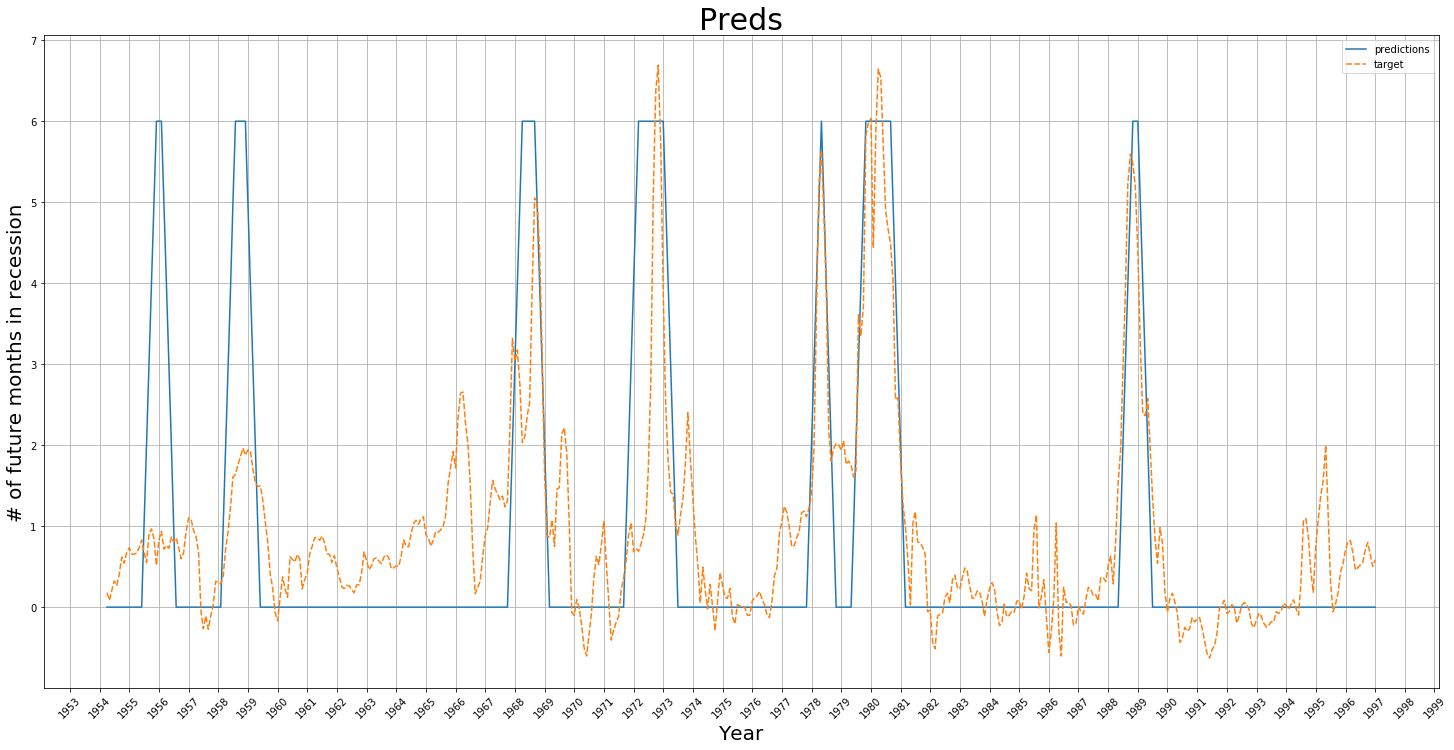

In [41]:
graph_results(ts_train, y_train, pred_t)

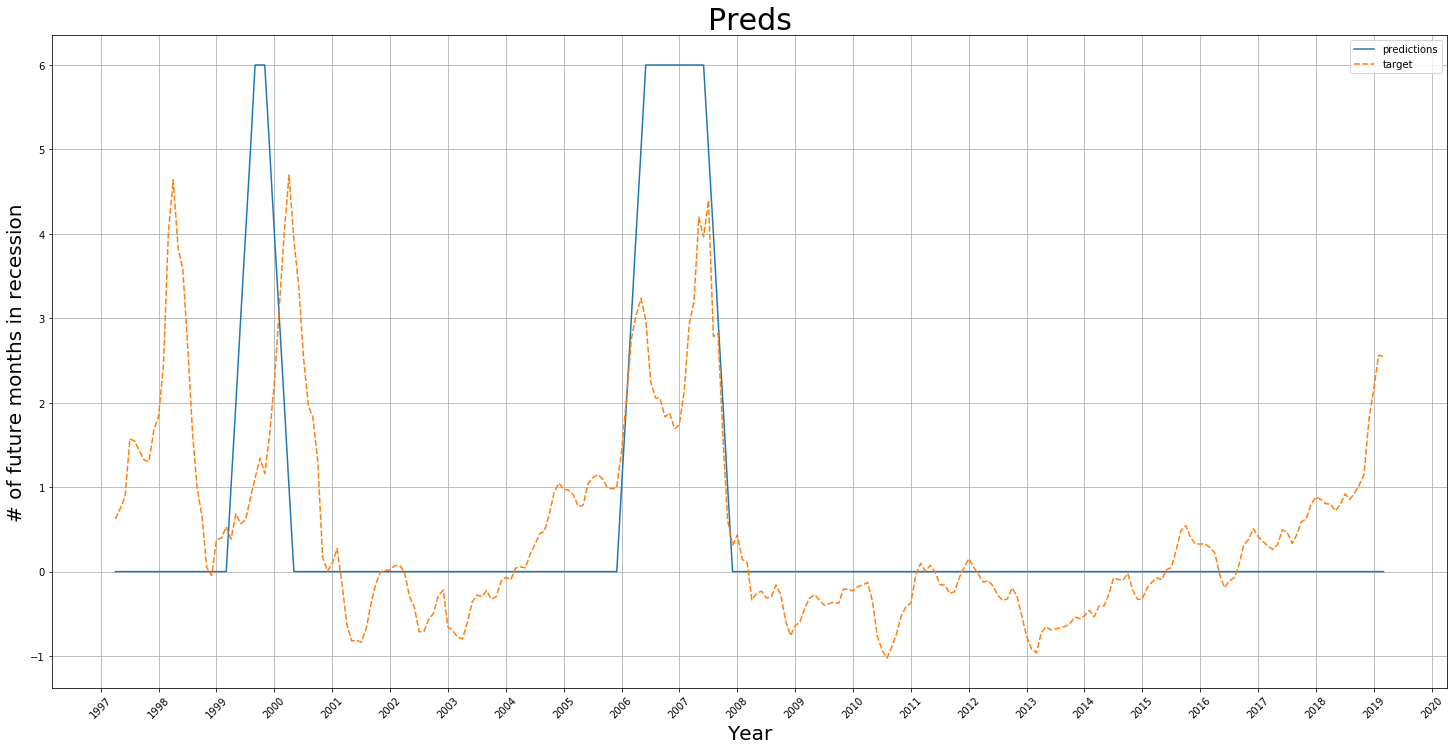

In [42]:
graph_results(ts_test, y_test, pred)

In [47]:
dataset

array([[-0.08,  0.04,  1.05,  1.5 ,  0.  ],
       [-0.3 , -0.34,  0.68,  1.14,  0.  ],
       [-0.05, -0.03,  0.9 ,  1.32,  0.  ],
       ...,
       [-0.3 , -0.44, -0.57, -0.34,  0.  ],
       [-0.17, -0.35, -0.63, -0.49,  0.  ],
       [-0.16, -0.25, -0.49, -0.35,  0.  ]])

In [53]:
mean_squared_error(y_test, pred)

1.9954527900867434

In [51]:
mean_squared_error(y_train, pred_t)

1.5782477857505615